In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
class plot_error_surface(object):
  def __init__(self,w_range,b_range,X,Y,n_samples=30,go=True):
    W = np.linspace(-w_range,  w_range , n_samples)
    B = np.linspace(-b_range, b_range, n_samples)
    w, b = np.meshgrid(W,B)
    Z = np.zeros((30,30))
    count1 = 0
    self.y = Y.numpy()
    self.x = X.numpy()
    for w1 , b1 in zip(w, b):
      count2 = 0
      for w2 ,b2 in zip(w2,b2):
        yhat = 1/ (1+ np.exp(-1*(w2*self.x+b2)))
        Z[count1,count2] = -1 *np.mean(self.y*np.log(yhat+1e-16)+(1-self.y)*np.log(1-yhat+1e-16))
        count2+=1
      count1 +=1
    self.Z = Z
    self.w = w
    self.b=b
    self.W=[]
    self.B=[]
    self.LOSS  = []
    self.n = 0
    if go == True:
      plt.figure()
      plt.figure(figsize=(7.5,5))
      plt.axes(projection="3d").plot_surface(self.w,self.b,self.Z,rstride=1,cstride =1 , cmap = "viridis", edgecolor= "none")
      plt.title("loss Surface")
      plt.xlabel("w")
      plt.ylabel("b")
      plt.contour(self.w,self.b,self.Z)
      plt.show()

      #Setter
      def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.Loss.append(loss)

      def final_plot(Self):
        ax= plt.axes(projection = "3d")
        ax.plot_wireframe(self.w,self.b,self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c="r", marker ="x", s=200 , alpha =1 )
        plt.figure()
        plt.contour(self.w,self.b,self.Z)
        plt.scatter(self.W , self.B , c="r", marker ="x")
        plt.xlabel("w")
        plt.ylabel("b")
        plt.show()

      def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x[self.y==0], self.y[self.y==0],"ro",label = "Training points")
        plt.plot(self.x[self.y==1],self.y[self.y==1]-1,"o", label ="Training points")
        plt.plot(self.x, self.W[-1]* self.x + self.B[-1], label = "estimated line")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.lim((-0.1,2))
        plt.title("Data Space Iteration" + str(self.n))
        plt.xlabel("w")
        plt.ylabel("b")


      def PlotStuff(X,Y , model , epoch , leg =True):
        plt.plot(X.numpy(), model(X).detach().numpy(), label=("epoch"+str(epoch)))
        plt.plot(X.numpy(), Y.numpy(),"r")
        if leg == True:
          plt.legend()
        else:
          pass








In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

class Data(Dataset):

  def __init__(self) :
    self.x = torch.arange(-1,1,0.1).view(-1,1)
    self.y = torch.zeros (self.x.shape[0],1)
    self.y[self.x[:,0] > 0.2] = 1
    self.len = self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len


In [ ]:
data_set = Data()

In [ ]:
data_set.x

tensor([[-1.0000e+00],
        [-9.0000e-01],
        [-8.0000e-01],
        [-7.0000e-01],
        [-6.0000e-01],
        [-5.0000e-01],
        [-4.0000e-01],
        [-3.0000e-01],
        [-2.0000e-01],
        [-1.0000e-01],
        [-2.9802e-09],
        [ 1.0000e-01],
        [ 2.0000e-01],
        [ 3.0000e-01],
        [ 4.0000e-01],
        [ 5.0000e-01],
        [ 6.0000e-01],
        [ 7.0000e-01],
        [ 8.0000e-01],
        [ 9.0000e-01]])

In [ ]:
data_set.y

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
len(data_set)

20

In [ ]:
x,y = data_set[0]
print(f"x={x} , y = {y}")

x=tensor([-1.]) , y = tensor([0.])


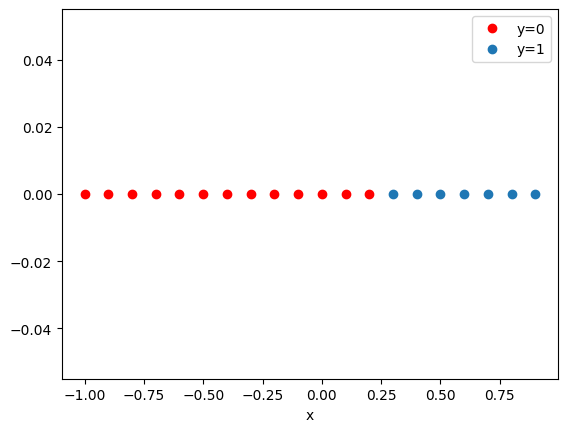

In [ ]:
plt.plot(data_set.x[data_set.y==0], data_set.y[data_set.y==0],"ro", label = "y=0")
plt.plot(data_set.x[data_set.y==1], data_set.y[data_set.y==1]-1,"o", label="y=1")
plt.xlabel("x")
plt.legend()